# Exercises 08

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit #non so se queste ultime due servono
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

## Exercise 08.2 - Simulated annealing

### Armonic potential

Firsty, we tried the algorithm on a simple armonic potential. The expected value for $<H>$ is in this case 0.5, with $\mu=0$ and $\sigma=1$.

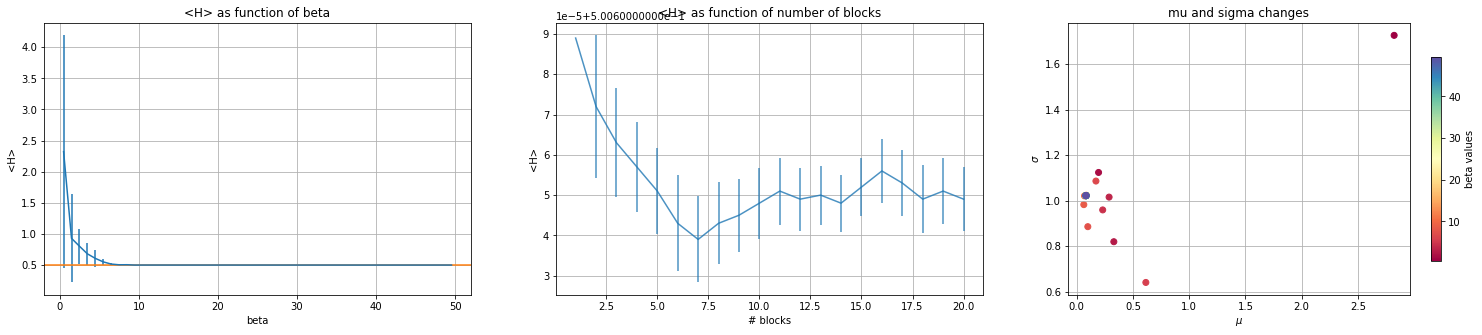

In [2]:
path = "Es2/Armonic/Block_ave.out"
x, y_int, err_int = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Es2/Armonic/Integral(beta).out"
beta, sigma, mu, I, err_I = np.loadtxt(path, usecols=(0, 1, 2, 3, 4), unpack='true')

fig, (ax1, ax2, ax3)=plt.subplots(1,3,  figsize=(26, 5))


ax2.errorbar(x, y_int, yerr=err_int, label = "simulated", alpha = 0.8)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('<H>')
ax2.grid("True")
ax2.set_title("<H> as function of number of blocks")


ax1.errorbar(beta, I, yerr=err_I, label = "simulated")
ax1.set_xlabel('beta')
ax1.set_ylabel('<H>')
ax1.grid("True")
ax1.set_title("<H> as function of beta")
ax1.axhline(y=0.5, c="tab:orange")

#for i in range(len(beta)-1):
#    ax2.scatter(mu[i:i+2], sigma[i:i+2], color=cmap(norm(beta[i])))
plt.scatter(mu, sigma, c=beta, cmap='Spectral')
cbar=plt.colorbar(label="beta values", orientation="vertical",shrink=.75)
ax3.set_xlabel('$\mu$')
ax3.set_ylabel('$\sigma$')
ax3.grid("True")
ax3.set_title("mu and sigma changes")

plt.show()

As expeted at high temperatures the value of the integral is not accurate and the values of mu and sigma fluctuates a lot. As the temperatures lowers the integral converges to the right value.

### Given Potential

Once we realized that our algorithm was able to find the right values for mu and sigma, we tried using a different potential: $V(x) = x^4 - \frac{5}{2}x^2$.

In this case the expected value for $<H>$ is -0.46, but $\mu$ and $\sigma$ are unknown.

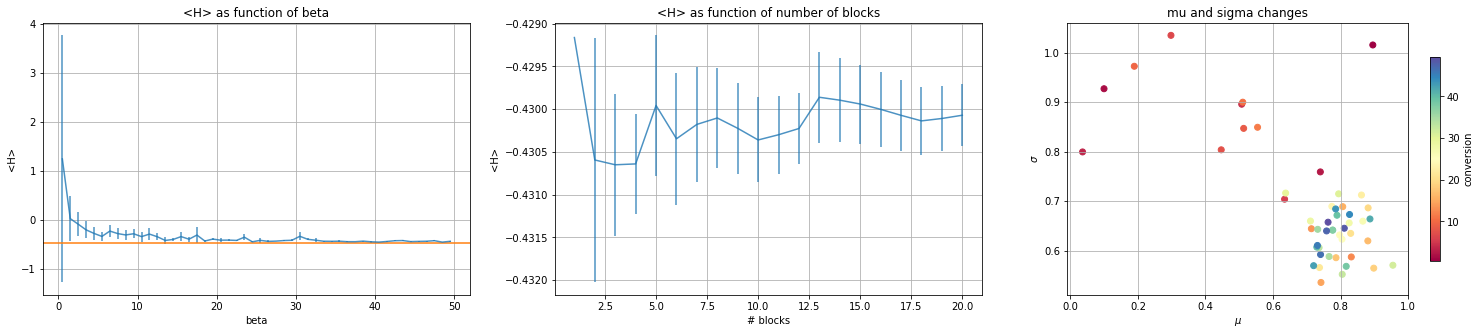

In [3]:
path = "Es2/Given/Block_ave.out"
x, y_int, err_int = np.loadtxt(path, usecols=(0, 1, 2), unpack='true')

path = "Es2/Given/Integral(beta).out"
beta, sigma, mu, I, err_I = np.loadtxt(path, usecols=(0, 1, 2, 3, 4), unpack='true')

fig, (ax1, ax2, ax3)=plt.subplots(1,3,  figsize=(26, 5))


ax2.errorbar(x, y_int, yerr=err_int, label = "simulated", alpha = 0.8)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('<H>')
ax2.grid("True")
ax2.set_title("<H> as function of number of blocks")


ax1.errorbar(beta, I, yerr=err_I, label = "simulated", alpha = 0.8)
ax1.set_xlabel('beta')
ax1.set_ylabel('<H>')
ax1.grid("True")
ax1.set_title("<H> as function of beta")
ax1.axhline(y=-0.46046587969271524, c="tab:orange")

plt.scatter(mu, sigma, c=beta, cmap='Spectral')
cbar=plt.colorbar(label="conversion", orientation="vertical",shrink=.75)
ax3.set_xlabel('$\mu$')
ax3.set_ylabel('$\sigma$')
ax3.grid("True")
ax3.set_title("mu and sigma changes")

mu0=mu[48]
sigma0=sigma[48]


plt.show()

Using this potential the integral converges to -0.43. $<H>$ as function of number of blocks it is not compatible with the expected value, but this is because the error on the block average is vastly underestimated because it does not take in account the fact that the values of $\mu$ and $\sigma$ are not determined univocally and even a small variation in one of them changes greatly the value of the integral.

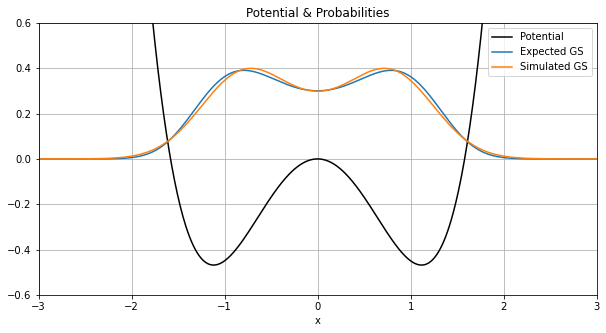

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

psi_1=np.zeros(N)

norm=2*np.sqrt(3.14)*sigma0*(1+np.exp(-(mu0/sigma0)**2))

for i in range (N): 
    psi_1[i]=math.exp(-(((x[i]+mu0)/sigma0)**2)/2)+math.exp(-(((x[i]-mu0)/sigma0)**2)/2)
    
# Plot a few things
plt.figure(figsize=(10,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label="Expected GS")
plt.plot(x,((psi_1)**2)/norm, label="Simulated GS")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

Nevertheless, using the final values of $\mu$ and $\sigma$ we are able to get a good estimation of the eigenfunction of the ground state.

Before printing the graph we had to normalize the wave function, by evaluating $$  \int_{-\infty}^{\infty} \lvert \psi(x) \rvert^2 \,dx = \int_{-\infty}^{\infty}\Bigg | e^{- \frac{(x-\mu)^2}{\sigma^2}}+ e^{- \frac{(x+\mu)^2}{\sigma^2}} \Bigg |^2 \thinspace dx = 2 \thinspace \sqrt{\pi} \thinspace \sigma \thinspace(1+e^{- \frac {\mu^2}{\sigma^2}}) $$